In [10]:
import pandas as pd

def get_starters(df,pos):
    df = df[(df.Pos.str.contains(pos))]
    df = df.groupby('Team').max().reset_index()
    df = df.drop('Player', axis=1)
    return df


In [14]:
salaries_2021 = pd.read_csv(r"C:\Users\JustinK\Downloads\2021 All Salaries - Salary_all.csv")
salaries_2022 = pd.read_csv(r"C:\Users\JustinK\Downloads\2022 All Salaries - Salary_all.csv")
columns = ['Pos', 'Team', 'Player','AA$' ,'Salary', "% of Cap", 'Win', "Win %"]

raw_data = [salaries_2021,salaries_2022]
dfs = [];
for df in raw_data:
    df = pd.DataFrame(df,columns=columns)
    df = df[~(df['Salary'] <= 1)]
    positions = df.Pos.unique()
    starter_df = pd.DataFrame()
    for p in positions:
        temp = get_starters(df,p)
        starter_df = pd.concat([starter_df,temp])
    dfs.append(starter_df)
all_years = pd.concat(dfs)
all_years.to_clipboard()
correlation = all_years.groupby('Pos')[['% of Cap','Win %']].corr(method="kendall")
correlation = correlation.drop('% of Cap', axis=1)
correlation = correlation.drop('P',axis=0)
correlation = correlation[~(correlation['Win %'] == 1)]
correlation = correlation.round(3)

<Axes: ylabel='Pos-None'>

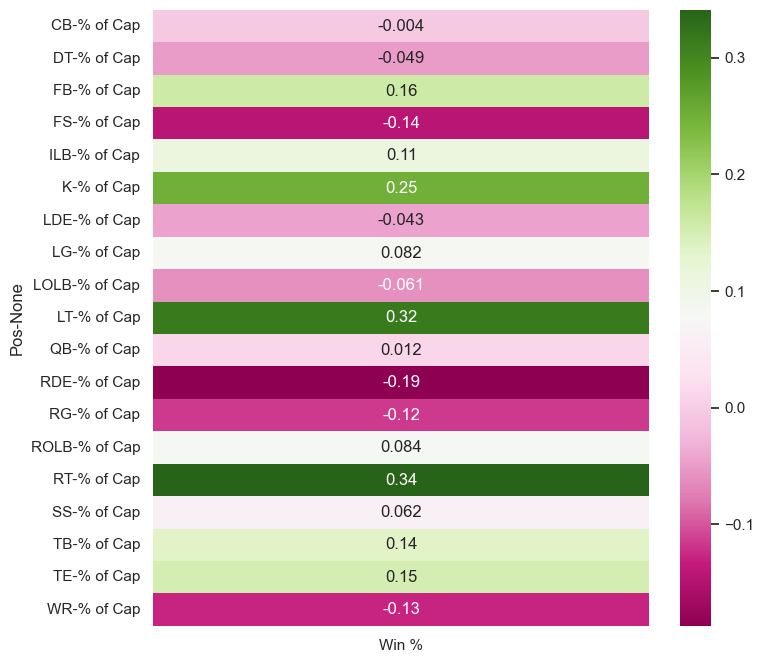

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.set(rc={'figure.facecolor':'lightgrey'})
sns.heatmap(correlation, annot=True, cmap='PiYG')